# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [81]:
import math
import sys

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [83]:
# YOUR CODE HERE
df = pd.read_csv("wine_quality_white.tsv", sep="\t")
df.sample(n=10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
548,6.5,0.18,0.31,1.7,0.044,30.0,127.0,0.99280,3.49,0.50,10.2,7
4379,6.1,0.34,0.21,5.0,0.042,17.0,133.0,0.99373,3.02,0.53,9.4,5
558,5.9,0.21,0.24,12.1,0.044,53.0,165.0,0.99690,3.25,0.39,9.5,5
2265,6.9,0.30,0.21,15.7,0.056,49.0,159.0,0.99827,3.11,0.48,9.0,5
819,6.6,0.56,0.22,8.9,0.034,27.0,133.0,0.99675,3.20,0.51,9.1,5
4647,5.8,0.26,0.29,1.0,0.042,35.0,101.0,0.99044,3.36,0.48,11.4,7
2864,5.3,0.16,0.39,1.0,0.028,40.0,101.0,0.99156,3.57,0.59,10.6,6
2643,8.1,0.33,0.22,5.2,0.047,24.0,151.0,0.99527,3.22,0.47,10.3,5
2067,7.6,0.29,0.29,4.4,0.051,26.0,146.0,0.99390,3.16,0.39,10.2,5
986,7.4,0.28,0.30,5.3,0.054,44.0,161.0,0.99410,3.12,0.48,10.3,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

#### Describe the dataset

In [84]:
# YOUR CODE HERE
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### Dataset information

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [86]:
columns = df.columns.tolist()
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

#### Dataset columns Described

<strong>Fixed Acidity</strong> - this feature defines the the amount of non-volatile acids. A higher level in the wine likely will make the wine more tart, and therefore enhances a feature known as crispness.<br>
<strong>Volatile Acidity</strong> - the higher the value for this feature the more "vinegar-like" the wine will taste<br>
<strong>Citric Acid</strong> - higher level of citric acid may give wine a "fresh" taste<br>
<strong>Residual Sugar</strong> - represents the amount of sugar left after the wine is fermented, higher levels affect "sweetness" of the wine<br>
<strong>Chlorides</strong> - this designates the amount of salt in the wine<br>
<strong>Free sulfur Dioxide</strong> - these protect a wine from being spoiled and from reacting with oxygen<br>
<strong>Total sulfur Dioxide</strong> - this affects how long a wine can keep (preservation) and whether the wine will trigger allergies<br>
<strong>Density</strong> - the basic density of the wine is related to the amount of alcohol and sugar<br>
<strong>pH</strong> - a low value indicates high acidity<br>
<strong>Sulphates</strong> - this will add to a wines ability to fight everyday microbes and contributes to the wine's ability to not react with oxygen<br>
<strong>Alchohol</strong> - percent of alcohol <br>
<strong>Target</strong> - quality score given by wine tasters, on a scale of 1 - 10<br>

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

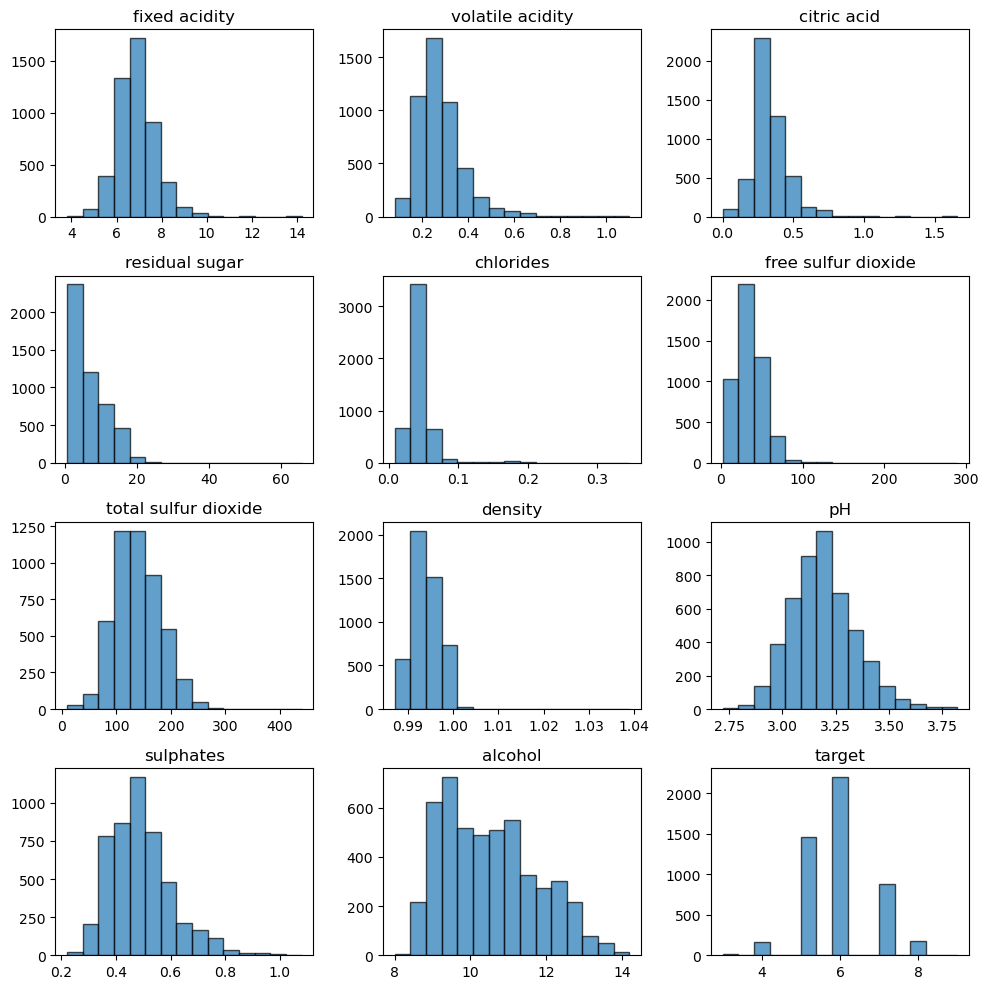

In [87]:
# YOUR CODE HERE
df.hist(bins=15, grid=False, edgecolor='black', alpha=0.7, figsize=(10,10))
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

#### fixed acidity

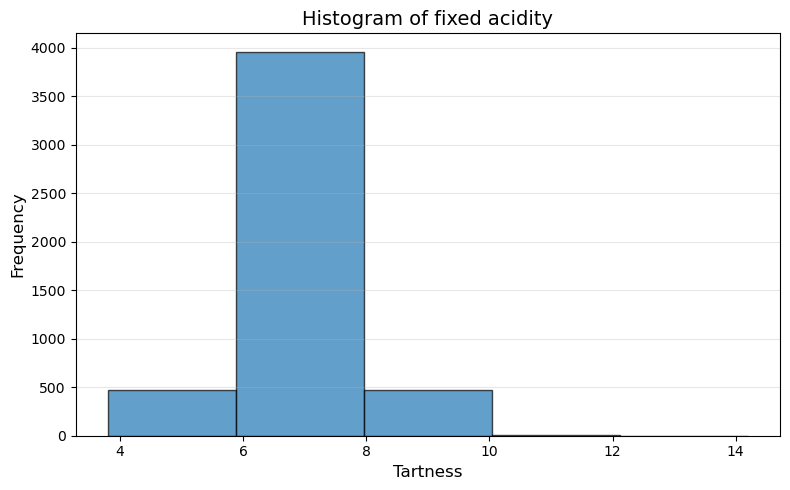

In [88]:
# YOUR CODE HERE
column_to_plot = 'fixed acidity'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Tartness', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

#### volatile acidity

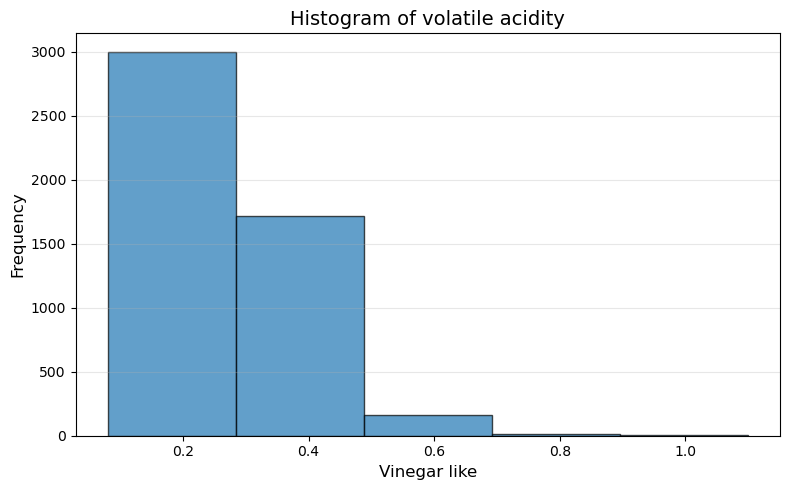

In [89]:
# YOUR CODE HERE
column_to_plot = 'volatile acidity'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Vinegar like', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

#### citric acid

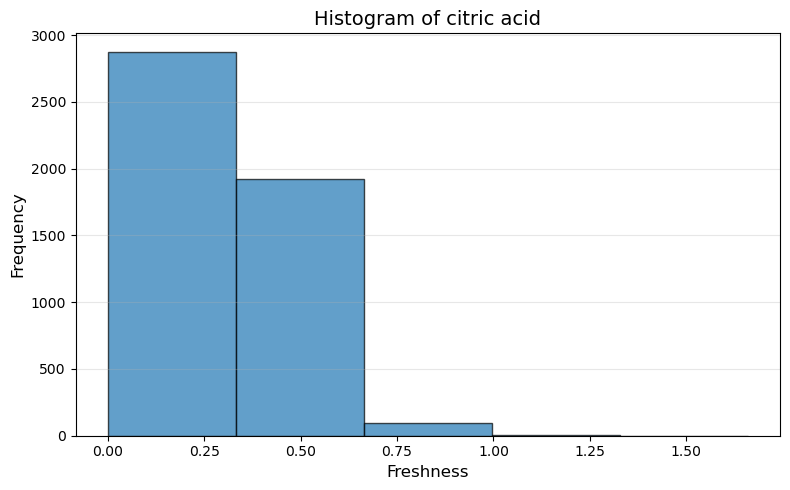

In [90]:
# YOUR CODE HERE
column_to_plot = 'citric acid'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Freshness', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

#### residual sugar

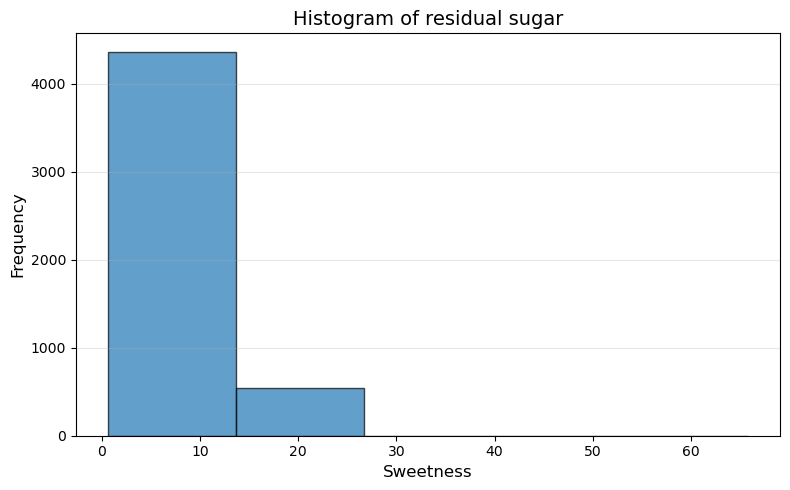

In [91]:
# YOUR CODE HERE
column_to_plot = 'residual sugar'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Sweetness', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### free sulfur dioxide

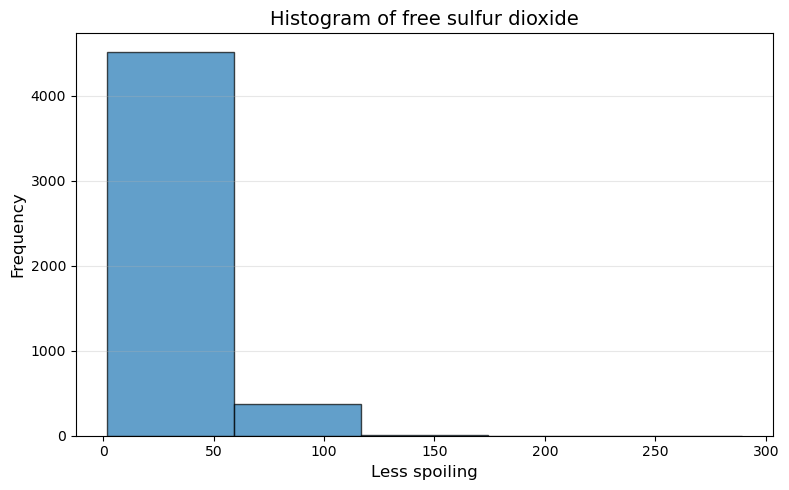

In [92]:
# YOUR CODE HERE
column_to_plot = 'free sulfur dioxide'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Less spoiling', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### chlorides

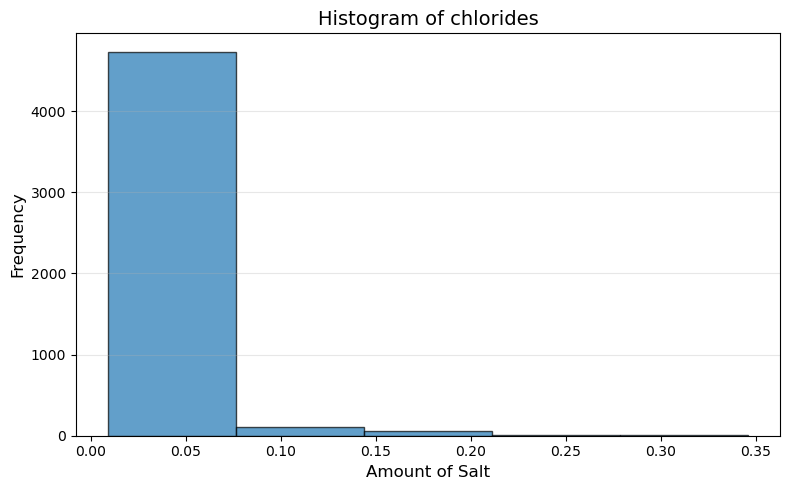

In [93]:
# YOUR CODE HERE
column_to_plot = 'chlorides'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Amount of Salt', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### total sulfur dioxide

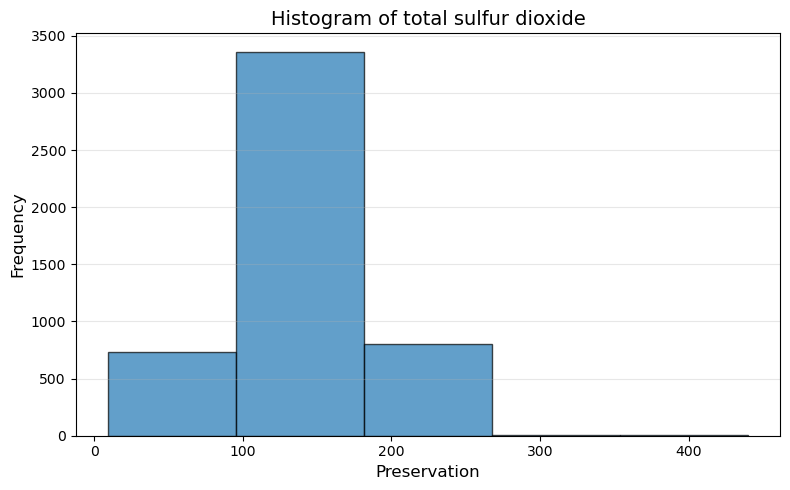

In [94]:
# YOUR CODE HERE
column_to_plot = 'total sulfur dioxide'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Preservation', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

#### density

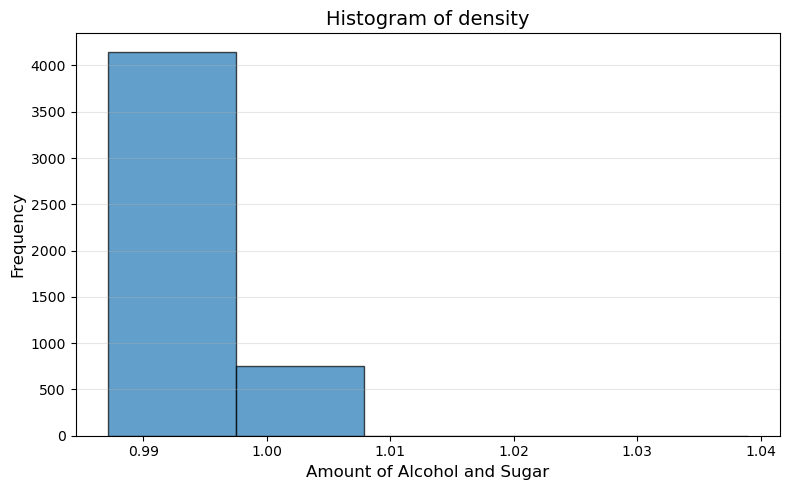

In [95]:
# YOUR CODE HERE
column_to_plot = 'density'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Amount of Alcohol and Sugar', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### pH

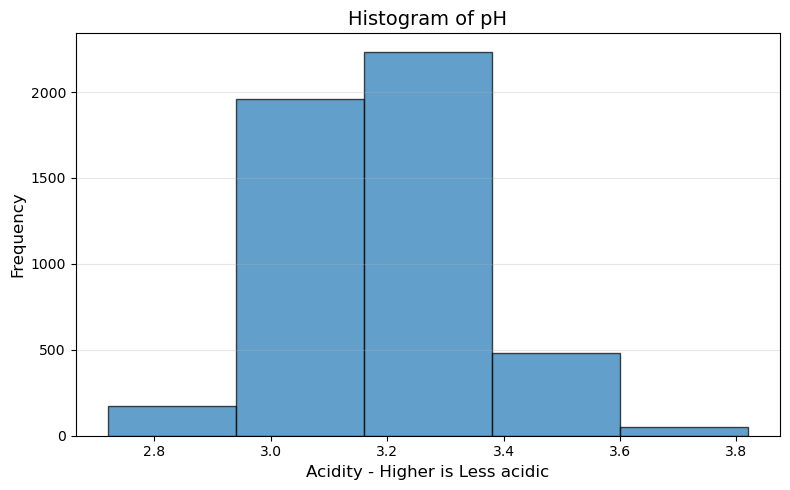

In [96]:
# YOUR CODE HERE
column_to_plot = 'pH'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Acidity - Higher is Less acidic', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### Sulphates

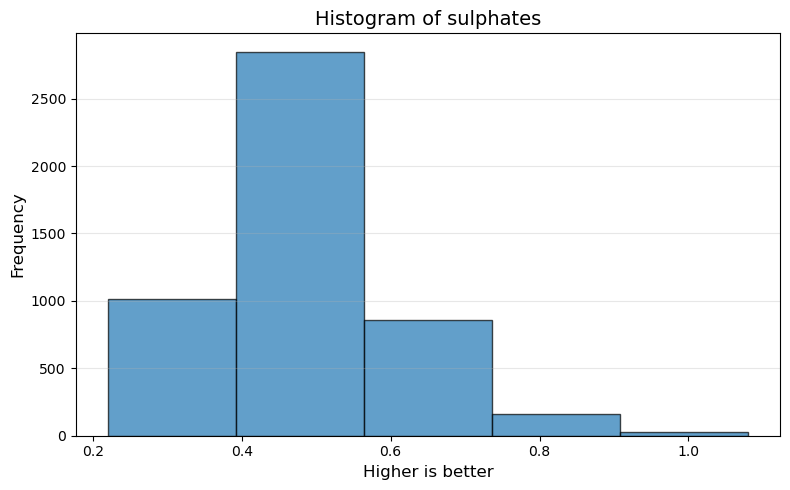

In [97]:
# YOUR CODE HERE
column_to_plot = 'sulphates'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Higher is better', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### alcohol

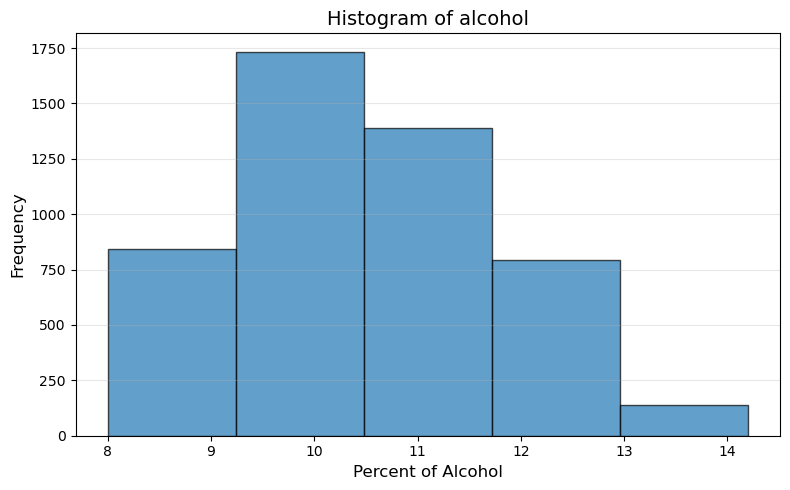

In [98]:
# YOUR CODE HERE
column_to_plot = 'alcohol'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Percent of Alcohol', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### target

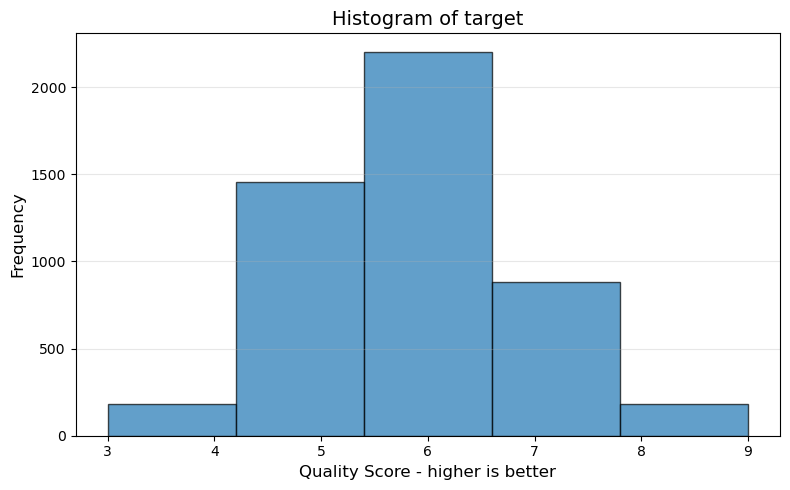

In [99]:
# YOUR CODE HERE
column_to_plot = 'target'
data = df[[column_to_plot]].dropna()

fig, ax = plt.subplots(figsize=(8, 5))

hist = data.hist(bins=5, ax=ax, grid=False, edgecolor='black', alpha=0.7)

ax.set_title(f'Histogram of {column_to_plot}', fontsize=14)
ax.set_xlabel('Quality Score - higher is better', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

Explained variance by first half (5 components): 0.7278
MSE (full features): 0.5543
MSE (first-half PCA features): 0.6206


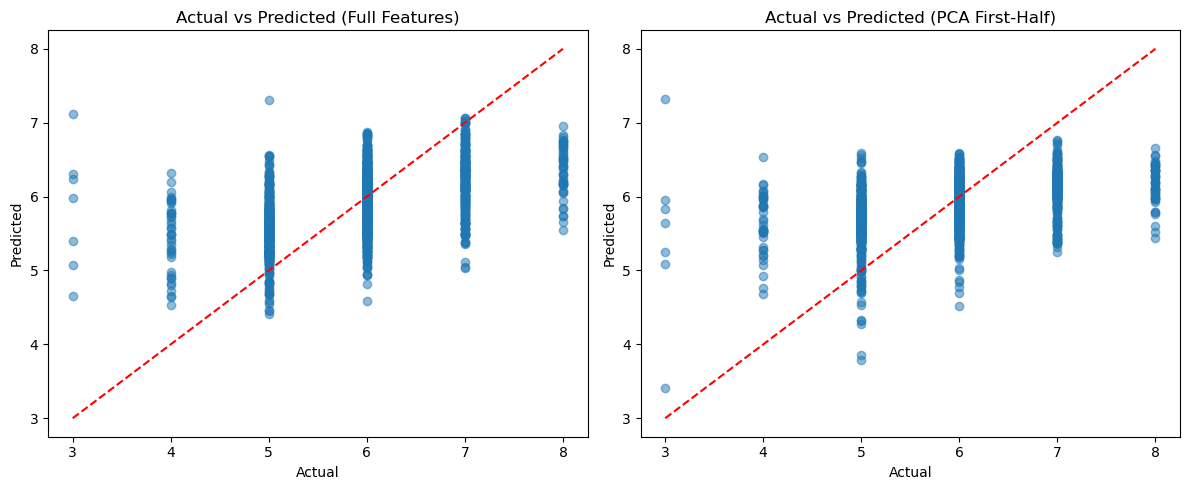

In [100]:
# PCA-based regression using first half of principal components
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select numeric input columns (excluding target)
numeric_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
input_cols = [c for c in numeric_columns if c != 'target']
X = df[input_cols].values
y = df['target'].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize using training set statistics
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0, ddof=0)
# avoid division by zero for constant columns
train_std[train_std == 0] = 1.0
X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - train_mean) / train_std

# Fit PCA on training data and transform
pca = PCA()
X_train_pcs = pca.fit_transform(X_train_scaled)
X_test_pcs = pca.transform(X_test_scaled)

n_components = pca.n_components_
half = n_components // 2 if n_components >= 2 else 1
explained_by_first_half = pca.explained_variance_ratio_[:half].sum()
print(f"Explained variance by first half ({half} components): {explained_by_first_half:.4f}")

# Train Linear Regression on original scaled features
lr_full = sklearn.linear_model.LinearRegression()
lr_full.fit(X_train_scaled, y_train)
y_pred_full = lr_full.predict(X_test_scaled)
mse_full = mean_squared_error(y_test, y_pred_full)
print(f"MSE (full features): {mse_full:.4f}")

# Train Linear Regression on first-half PCA coords
X_train_pca_half = X_train_pcs[:, :half]
X_test_pca_half = X_test_pcs[:, :half]
lr_pca = sklearn.linear_model.LinearRegression()
lr_pca.fit(X_train_pca_half, y_train)
y_pred_pca = lr_pca.predict(X_test_pca_half)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"MSE (first-half PCA features): {mse_pca:.4f}")

# Plot actual vs predicted for both models
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].scatter(y_test, y_pred_full, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title('Actual vs Predicted (Full Features)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

axes[1].scatter(y_test, y_pred_pca, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title('Actual vs Predicted (PCA First-Half)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

#### Input and Output Column dependent / independent and Why

##### Declare each column

In [101]:
df_FA = df['fixed acidity']
df_VA = df['volatile acidity']
df_CA = df['citric acid']
df_RS = df['residual sugar']
df_FS = df['free sulfur dioxide']
df_CL = df['chlorides']
df_TS = df['total sulfur dioxide']
df_DE = df['density']
df_pH = df['pH']
df_SU = df['sulphates']
df_AL = df['alcohol']

df_target = df['target']



##### Plots

###### Fixed Acidity plots

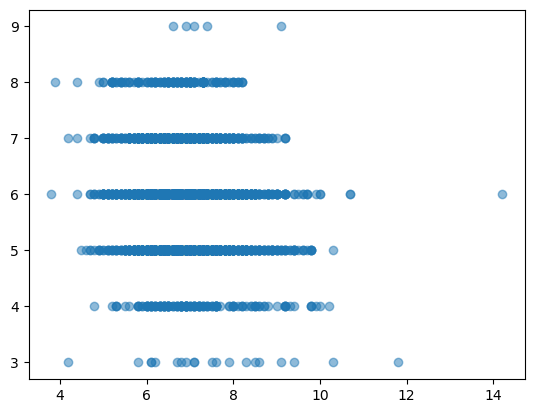

In [102]:
fixed_acidity_scatter = plt.scatter(df_FA, df_target, alpha=0.5)

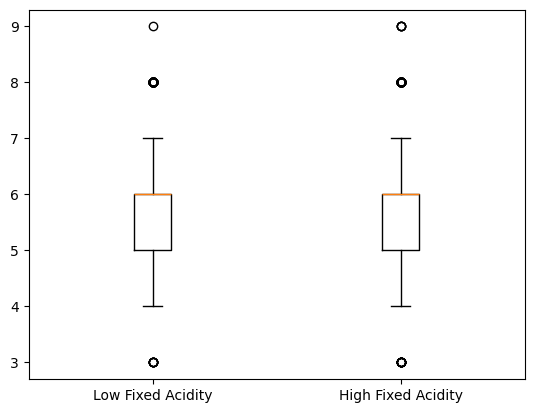

In [103]:
fixed_acidity_boxplot = plt.boxplot([df_target[df_FA <= df_FA.median()], df_target[df_FA > df_FA.median()]], tick_labels=['Low Fixed Acidity', 'High Fixed Acidity'])

###### Volatile Acidity plots

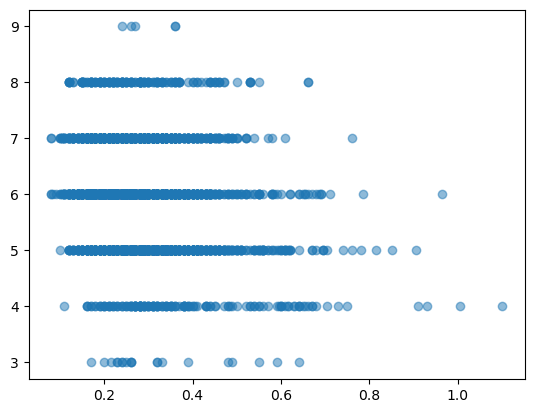

In [104]:
volatile_acidity_scatter = plt.scatter(df_VA, df_target, alpha=0.5)

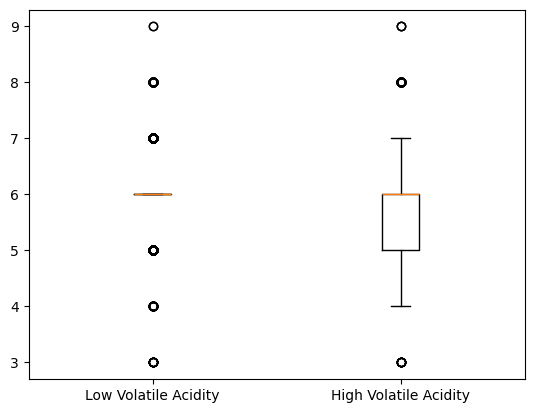

In [105]:
volatile_acidity_boxplot = plt.boxplot([df_target[df_VA <= df_VA.median()], df_target[df_VA > df_VA.median()]], tick_labels=['Low Volatile Acidity', 'High Volatile Acidity'])

###### Citric Acid plots

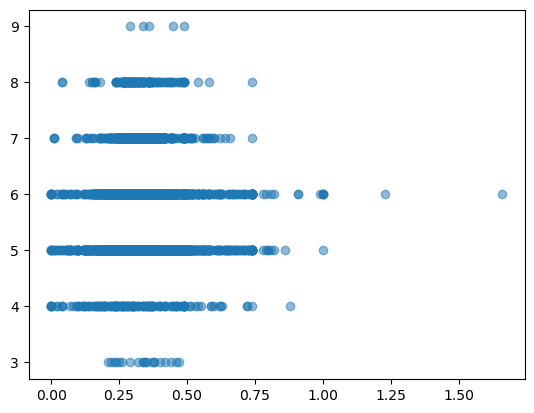

In [106]:
citric_acid_scatter = plt.scatter(df_CA, df_target, alpha=0.5)

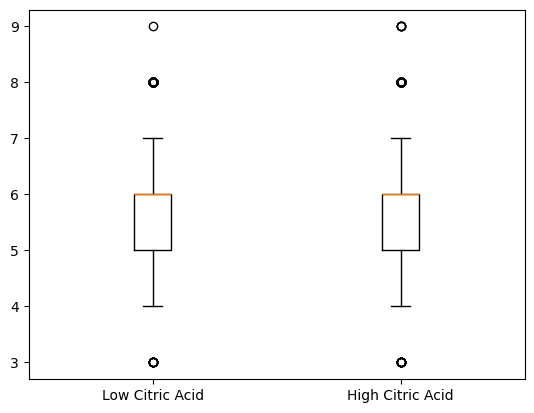

In [107]:
citric_acid_boxplot = plt.boxplot([df_target[df_CA <= df_CA.median()], df_target[df_CA > df_CA.median()]], tick_labels=['Low Citric Acid', 'High Citric Acid'])

###### Residual Sugar plots

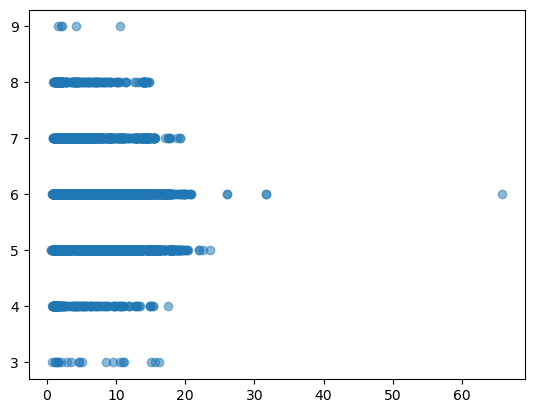

In [108]:
reisdual_sugar_scatter = plt.scatter(df_RS, df_target, alpha=0.5)

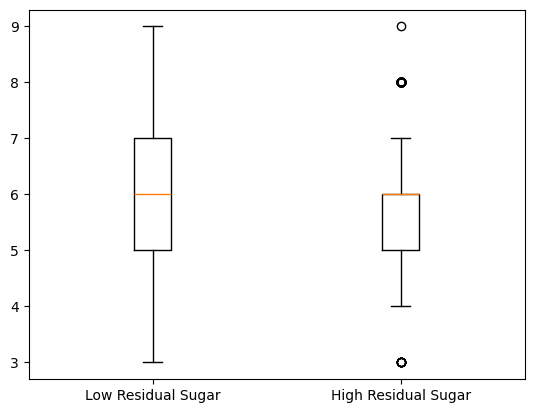

In [109]:
residual_sugar_boxplot = plt.boxplot([df_target[df_RS <= df_RS.median()], df_target[df_RS > df_RS.median()]], tick_labels=['Low Residual Sugar', 'High Residual Sugar'])

###### Free Sulphur Dioxide plots

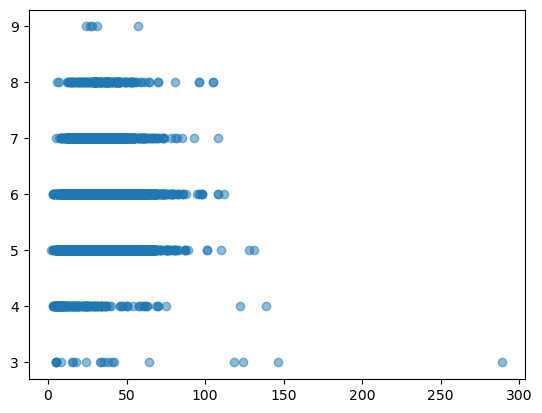

In [110]:
free_sulfur_dioxide_scatter = plt.scatter(df_FS, df_target, alpha=0.5)

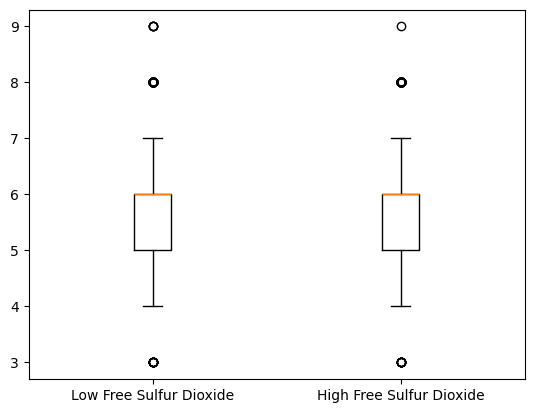

In [111]:
free_sulfur_dioxide_boxplot = plt.boxplot([df_target[df_FS <= df_FS.median()], df_target[df_FS > df_FS.median()]], tick_labels=['Low Free Sulfur Dioxide', 'High Free Sulfur Dioxide'])

###### Chlorides plots

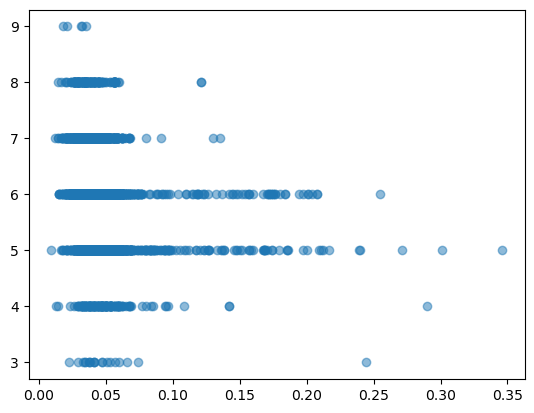

In [112]:
chlorides_scatter = plt.scatter(df_CL, df_target, alpha=0.5)

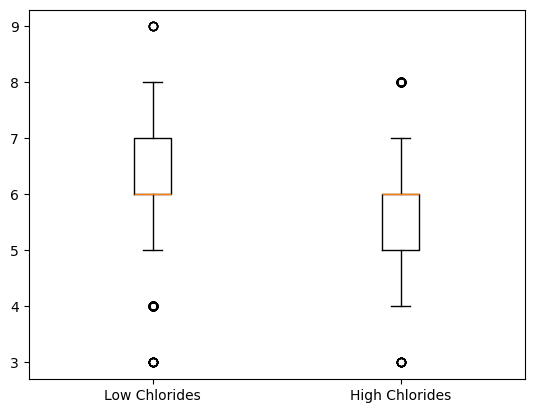

In [113]:
chlorides_boxplot = plt.boxplot([df_target[df_CL <= df_CL.median()], df_target[df_CL > df_CL.median()]], tick_labels=['Low Chlorides', 'High Chlorides'])

###### Total Sulfur Dioxide plots

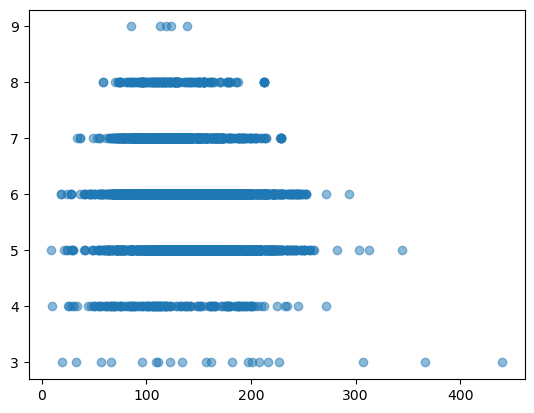

In [114]:
total_sulfur_dioxide_scatter = plt.scatter(df_TS, df_target, alpha=0.5)

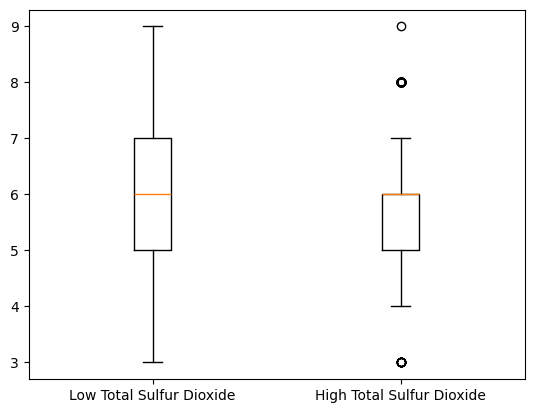

In [115]:
total_sulfur_dioxide_boxplot = plt.boxplot([df_target[df_TS <= df_TS.median()], df_target[df_TS > df_TS.median()]], tick_labels=['Low Total Sulfur Dioxide', 'High Total Sulfur Dioxide'])

###### Density plots

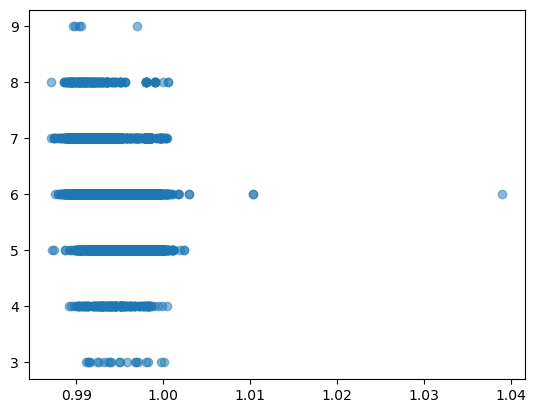

In [116]:
density_scatter = plt.scatter(df_DE, df_target, alpha=0.5)

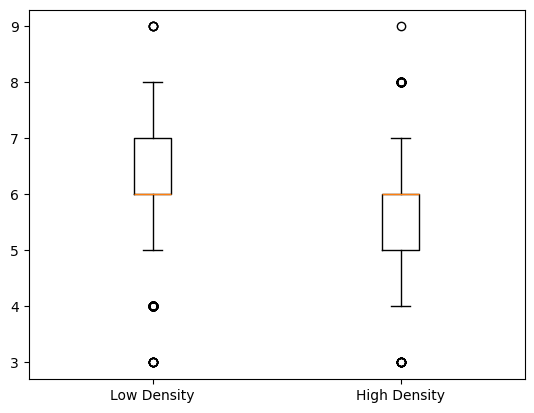

In [117]:
density_boxplot = plt.boxplot([df_target[df_DE <= df_DE.median()], df_target[df_DE > df_DE.median()]], tick_labels=['Low Density', 'High Density'])

###### pH plots

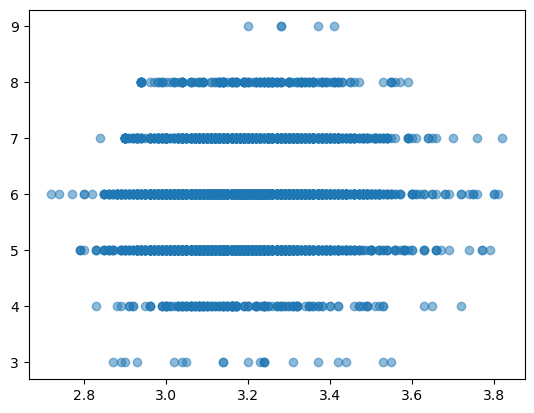

In [118]:
ph_scatter = plt.scatter(df_pH, df_target, alpha=0.5)

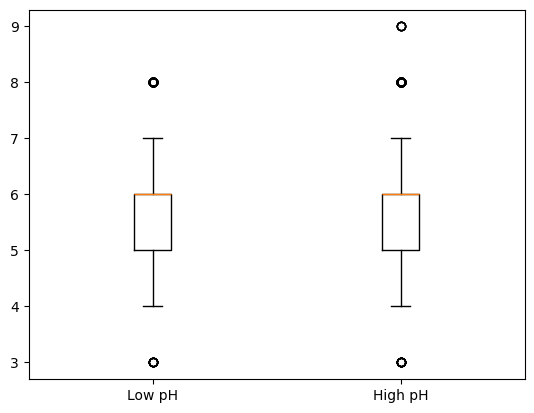

In [119]:
ph_boxplot = plt.boxplot([df_target[df_pH <= df_pH.median()], df_target[df_pH > df_pH.median()]], tick_labels=['Low pH', 'High pH'])

###### Sulphates plots

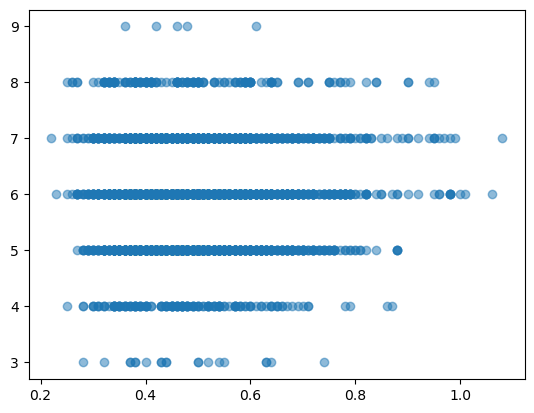

In [120]:
sulphates_scatter = plt.scatter(df_SU, df_target, alpha=0.5)

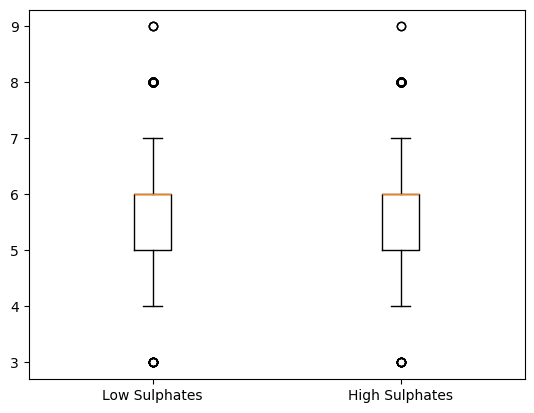

In [121]:
sulphates_boxplot = plt.boxplot([df_target[df_SU <= df_SU.median()], df_target[df_SU > df_SU.median()]], tick_labels=['Low Sulphates', 'High Sulphates'])

###### Alcohol plots

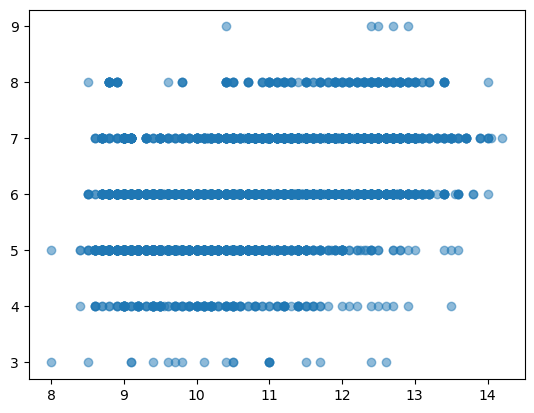

In [122]:
alcohol_scatter = plt.scatter(df_AL, df_target, alpha=0.5)

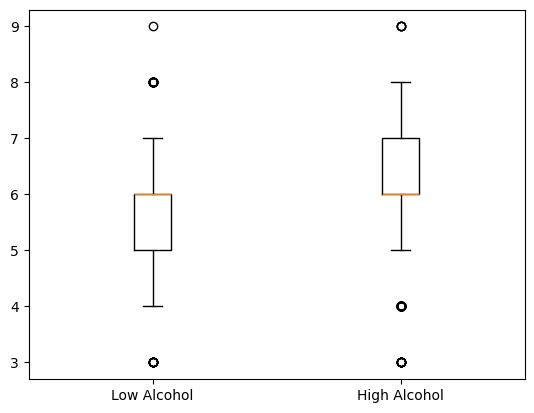

In [123]:
alcohol_boxplot = plt.boxplot([df_target[df_AL <= df_AL.median()], df_target[df_AL > df_AL.median()]], tick_labels=['Low Alcohol', 'High Alcohol'])

YOUR ANSWERS HERE

### Problem 5 (20 points) - fix

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Results for Random Forest Classifier:
  Feature Set 1: 0.5503



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Logistic Regression:
  Feature Set 1: 0.5374

Results for Ridge:
  Feature Set 1: 0.2535

Results for Linear SVC:
  Feature Set 1: 0.5279


Best model (lower score is better):
Model: Ridge
Feature Set: 1
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
Score: 0.2535


This can be plotted with the following results: 


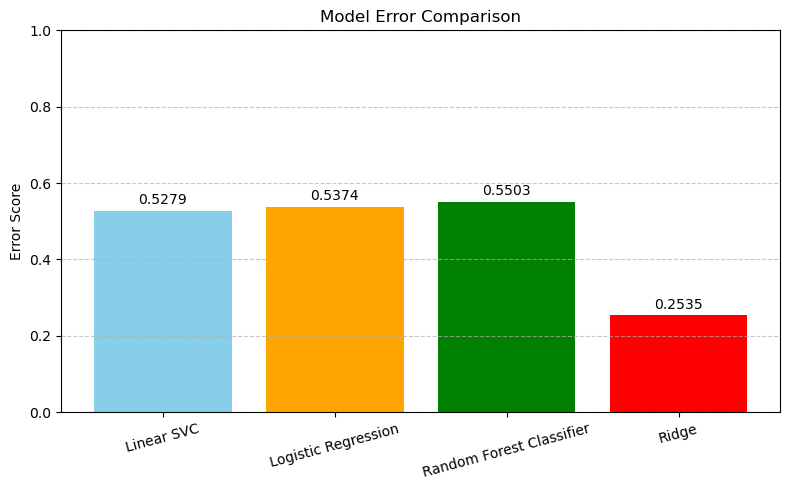

Best model: Ridge with feature set 1
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
Score: 0.2535


In [155]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn import ensemble

df_inputs = df.drop(columns=['target'])
df_target = df['target']

X = df_inputs.values
y = df_target.values

LinearRegressionModel = sklearn.linear_model.LinearRegression()
LinearRegressionModel.fit(X, y)

def train_model_with_features(model, data, features, target):
    """
    Train a model with given features and return the model and its accuracy score
    """
    # Select the features
    X = data[features].copy()
    
    # Get the target variable
    y = data[target]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    
    return model, score

def evaluate_models_with_feature_sets(df, target='target', lower_is_better=True):
    """
    Evaluate multiple models with different feature sets and store results
    """
    # Define models to evaluate
    models = [
        (sklearn.ensemble.RandomForestClassifier(n_estimators=7, max_depth=7), 'Random Forest Classifier'),
        (sklearn.linear_model.LogisticRegression(penalty='l2', max_iter=10000), 'Logistic Regression'),
        (sklearn.linear_model.Ridge(alpha=1.0, max_iter=10000), 'Ridge'),
        (sklearn.svm.LinearSVC(penalty='l2', max_iter=10000), 'Linear SVC')
    ]
    
    # Define feature sets to evaluate
    feature_sets = [
        ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
    ]
    
    # Store results
    results = []
    
    # Iterate through models and feature sets
    for model_obj, model_name in models:
        model_results = []
        
        for i, features in enumerate(feature_sets, 1):
            # Create a fresh instance of the model for each feature set
            if model_name == 'Random Forest Classifier':
                model = sklearn.ensemble.RandomForestClassifier(n_estimators=7, max_depth=7)
            elif model_name == 'Logistic Regression':
                model = sklearn.linear_model.LogisticRegression(penalty='l2', max_iter=10000)
            elif model_name == 'Ridge':
                model = sklearn.linear_model.Ridge(alpha=1.0, max_iter=10000)
            elif model_name == 'Linear SVC':
                model = sklearn.svm.LinearSVC(penalty='l2', max_iter=10000)
            
            # Train and evaluate
            _, score = train_model_with_features(model, df, features, target)
            
            # Store result
            result = {
                'model_name': model_name,
                'feature_set': i,
                'features': features,
                'score': score
            }
            
            results.append(result)
            model_results.append((f"Feature Set {i}", score))
        
        print(f"Results for {model_name}:")
        for feature_set, score in model_results:
            print(f"  {feature_set}: {score:.4f}")
        print()
    
    # Convert results to DataFrame for easier analysis
    results_df = pd.DataFrame(results)
    
    # Find the best model based on whether lower or higher scores are better
    if lower_is_better:
        best_idx = results_df['score'].idxmin()
        print("\nBest model (lower score is better):")
    else:
        best_idx = results_df['score'].idxmax()
        print("\nBest model (higher score is better):")
    
    best_result = results_df.loc[best_idx]
    print(f"Model: {best_result['model_name']}")
    print(f"Feature Set: {best_result['feature_set']}")
    print(f"Features: {best_result['features']}")
    print(f"Score: {best_result['score']:.4f}")
    
    # Create a plot of average model scores
    mean_scores = results_df.groupby('model_name')['score'].mean().reset_index()
    models = mean_scores['model_name'].tolist()
    scores = mean_scores['score'].tolist()
    
    print(f"\n\n\033[1mThis can be plotted with the following results:", end="\033[0m")
    print(" ", end="\n")
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, scores, color=['skyblue', 'orange', 'green', 'red'])
    
    # Annotate scores on bars
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{score:.4f}', ha='center', va='bottom', fontsize=10)
    
    plt.title('Model Error Comparison')
    plt.ylabel('Error Score')

    plt.ylim(0, 1)
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the plot as an image file
    metric_type = "Error" if lower_is_better else "Accuracy"
    
    # Show the plot
    plt.show()
    
    # Close the plot to regain memory resources
    plt.close()
    
    return results_df

# Example usage:

results_df = evaluate_models_with_feature_sets(df, target='target', lower_is_better=True)
# 
# # Find the best model and feature set combination
best_result = results_df.loc[results_df['score'].idxmin()]
print(f"Best model: {best_result['model_name']} with feature set {best_result['feature_set']}")
print(f"Features: {best_result['features']}")
print(f"Score: {best_result['score']:.4f}")

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


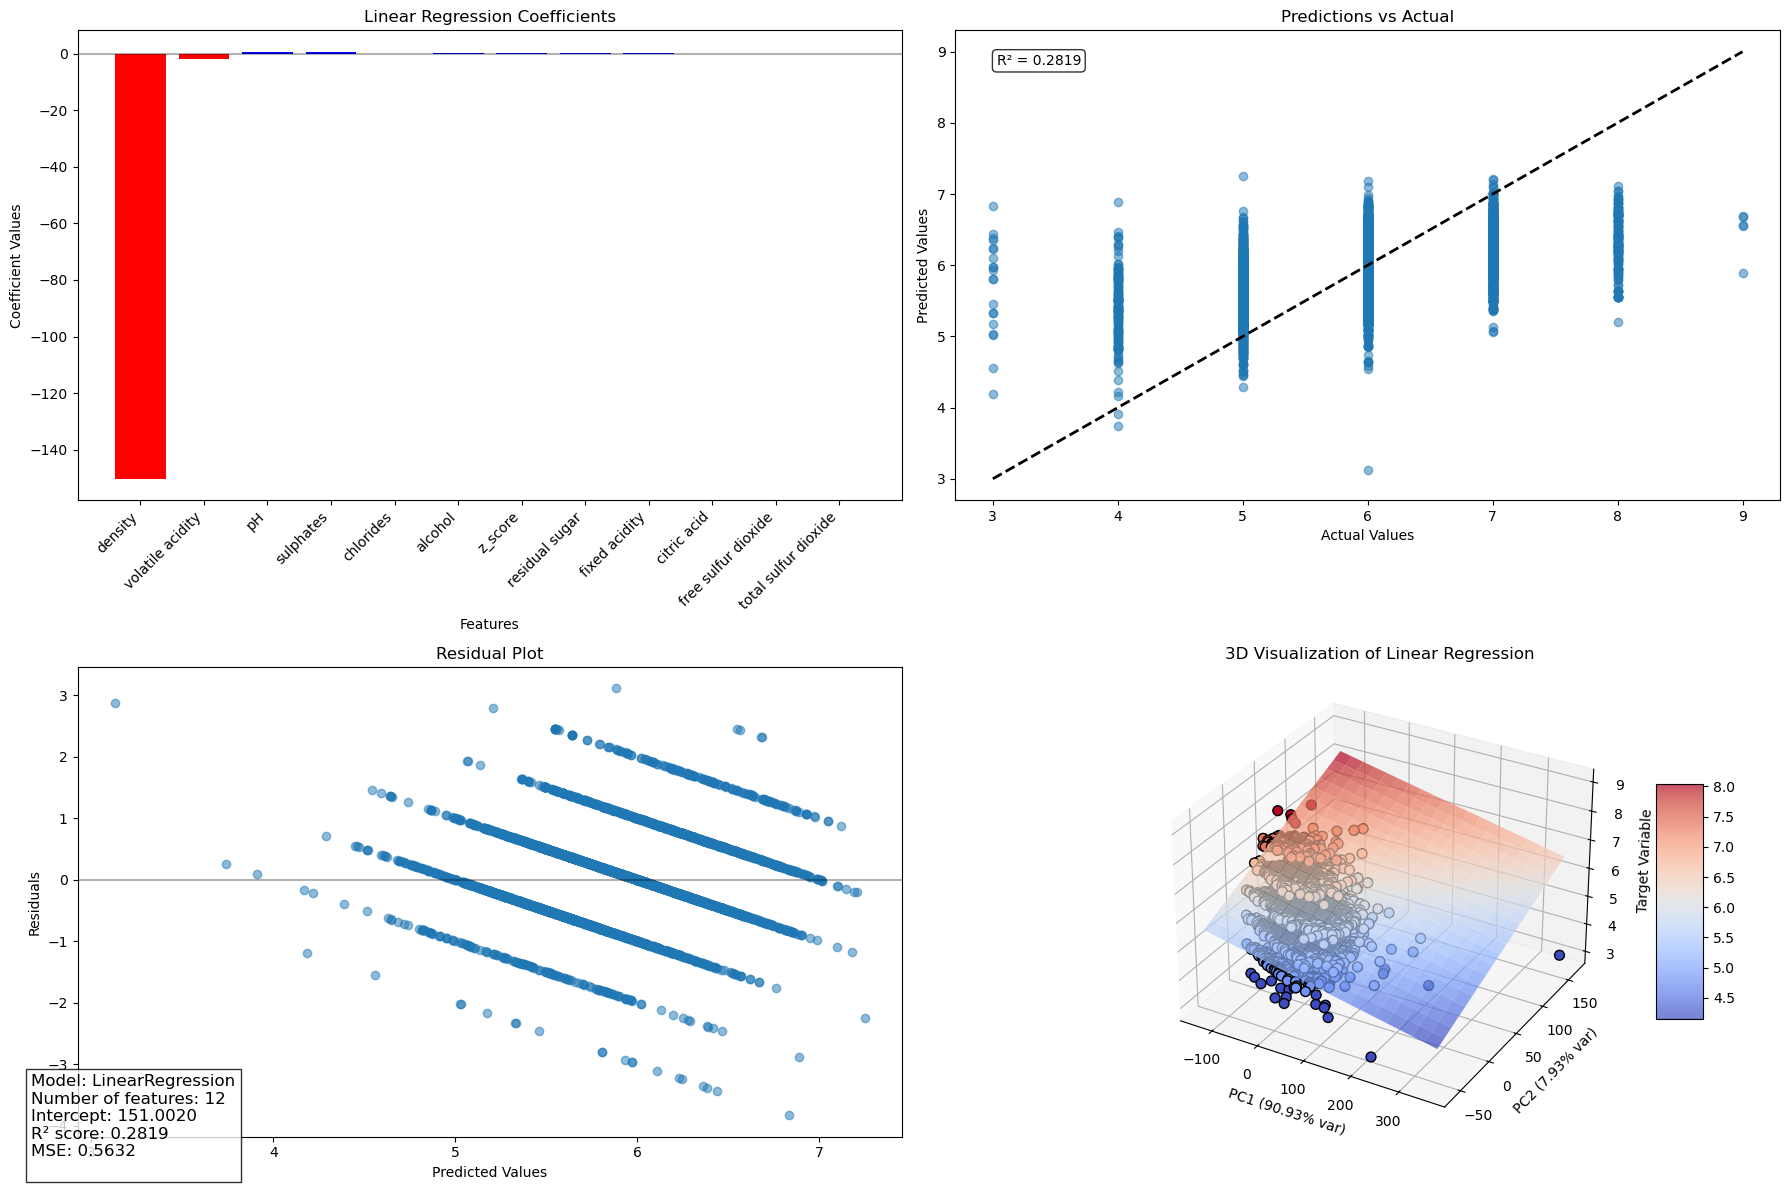

In [163]:
# YOUR CODE HERE

def plot_linear_regression(X, y, model, feature_names=None):
    if feature_names is None:
        feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]
    
    # Create figure with subplots declare the figure size
    
    fig = plt.figure(figsize=(18, 12))
    
    # Plot 1: Coefficient values
    ax1 = fig.add_subplot(221)
    coef = model.coef_
    indices = np.argsort(np.abs(coef))[::-1]
    ax1.bar(range(len(coef)), coef[indices], color=['red' if c < 0 else 'blue' for c in coef[indices]])
    ax1.set_xticks(range(len(coef)))
    ax1.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
    ax1.set_xlabel('Features')
    ax1.set_ylabel('Coefficient Values')
    ax1.set_title('Linear Regression Coefficients')
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Plot 2: Predictions vs Actual
    ax2 = fig.add_subplot(222)
    y_pred = model.predict(X)
    ax2.scatter(y, y_pred, alpha=0.5)
    ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax2.set_xlabel('Actual Values')
    ax2.set_ylabel('Predicted Values')
    ax2.set_title('Predictions vs Actual')
    
    # Calculate R-squared
    r_squared = model.score(X, y)
    residuals = y - y_pred
    ax2.text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=ax2.transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Plot 3: Residuals plot
    ax3 = fig.add_subplot(223)
    ax3.scatter(y_pred, residuals, alpha=0.5)
    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax3.set_xlabel('Predicted Values')
    ax3.set_ylabel('Residuals')
    ax3.set_title('Residual Plot')
    
    # Plot 4: 3D visualization 
    # Use PCA to get the most important dimensions
    if X.shape[1] >= 2:
        ax4 = fig.add_subplot(224, projection='3d')
        
        if X.shape[1] > 2:
            pca = PCA(n_components=2)
            X_reduced = pca.fit_transform(X)
            feature_names_reduced = ['PC1', 'PC2']
            explained_var = pca.explained_variance_ratio_
            ax4.set_xlabel(f'PC1 ({explained_var[0]:.2%} var)')
            ax4.set_ylabel(f'PC2 ({explained_var[1]:.2%} var)')
        else:
            X_reduced = X
            feature_names_reduced = feature_names
            ax4.set_xlabel(feature_names[0])
            ax4.set_ylabel(feature_names[1])
        
        # Create a mesh grid for the 3D surface
        x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
        y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20),
                              np.linspace(y_min, y_max, 20))
        
        # Get predictions for the mesh grid
        if X.shape[1] > 2:
            # We need to inverse transform from PCA space
            grid_points = np.c_[xx.ravel(), yy.ravel()]
            X_grid = pca.inverse_transform(grid_points)
            Z = model.predict(X_grid).reshape(xx.shape)
        else:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        # Plot the 3D surface
        surf = ax4.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7, linewidth=0)
        
        # Plot the actual data points
        scatter = ax4.scatter(X_reduced[:, 0], X_reduced[:, 1], y, c=y, 
                              cmap=plt.cm.coolwarm, s=50, alpha=1, edgecolor='k')
        
        ax4.set_zlabel('Target Variable')
        ax4.set_title('3D Visualization of Linear Regression')
        fig.colorbar(surf, ax=ax4, shrink=0.5, aspect=5)
    else:
        # If we only have 1 feature, create a 2D plot
        ax4 = fig.add_subplot(224)
        ax4.scatter(X[:, 0], y, alpha=0.5)
        
        # Create the regression line
        x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
        y_pred_line = model.predict(x_range)
        ax4.plot(x_range, y_pred_line, 'r-', linewidth=2)
        
        ax4.set_xlabel(feature_names[0])
        ax4.set_ylabel('Target Variable')
        ax4.set_title('Linear Regression Fit')
    
    # Add model information
    model_info = (
        f"Model: LinearRegression\n"
        f"Number of features: {X.shape[1]}\n"
        f"Intercept: {model.intercept_:.4f}\n"
        f"R² score: {r_squared:.4f}\n"
        f"MSE: {np.mean(residuals**2):.4f}\n"
    )
    
    fig.text(0.02, 0.02, model_info, wrap=True, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return fig

np.random.seed(42)
X = df_inputs
y = df_target

# Create feature names
feature_names = df_inputs.columns.tolist()

# Create and fit the model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# Plot the model
fig = plot_linear_regression(X, y, model, feature_names)
plt.show()

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

YOUR ANSWERS HERE

Threshold t = 34.0
Count x < t: 2425; mean = 116.70; std = 35.43
Count x >= t: 2473; mean = 159.60; std = 37.88
Two-sample t-test: t = -40.947, p = 0.000e+00


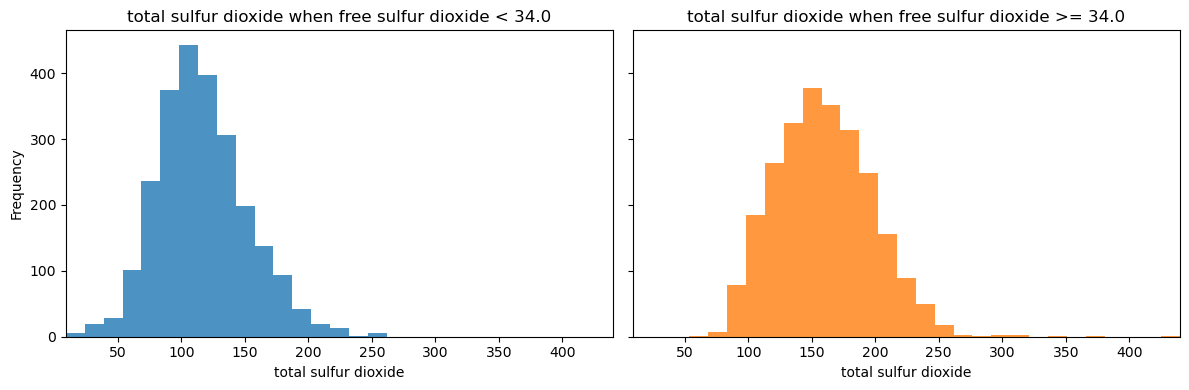

In [198]:

x_col = 'free sulfur dioxide'
y_col = 'total sulfur dioxide'

# Drop missing values 
sub = df[[x_col, y_col]].dropna()

# Choose threshold 
t = sub[x_col].median()

# Create masks and subsets
mask_low = sub[x_col] < t
mask_high = ~mask_low
y_low = sub.loc[mask_low, y_col]
y_high = sub.loc[mask_high, y_col]

# Print counts and basic stats to confirm there's enough data
print(f"Threshold t = {t}")
print(f"Count x < t: {len(y_low)}; mean = {y_low.mean():.2f}; std = {y_low.std():.2f}")
print(f"Count x >= t: {len(y_high)}; mean = {y_high.mean():.2f}; std = {y_high.std():.2f}")

tstat, pval = stats.ttest_ind(y_low, y_high, equal_var=False)
print(f"Two-sample t-test: t = {tstat:.3f}, p = {pval:.3e}")

bins = np.linspace(sub[y_col].min(), sub[y_col].max(), 30)
xlim = (bins[0], bins[-1])

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].hist(y_low, bins=bins, color='C0', alpha=0.8)
axes[0].set_title(f'{y_col} when {x_col} < {t:.1f}')
axes[0].set_xlabel(y_col)
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(xlim)

axes[1].hist(y_high, bins=bins, color='C1', alpha=0.8)
axes[1].set_title(f'{y_col} when {x_col} >= {t:.1f}')
axes[1].set_xlabel(y_col)
axes[1].set_xlim(xlim)

plt.tight_layout()
plt.show()

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

YOUR ANSWERS HERE

### Problem 9 (20 points) - fix

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

#### Text Correlation Matrix

In [128]:
# YOUR CODE HERE
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric = df[numeric_columns]

df_numeric.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


#### Visual Correlation Matrix

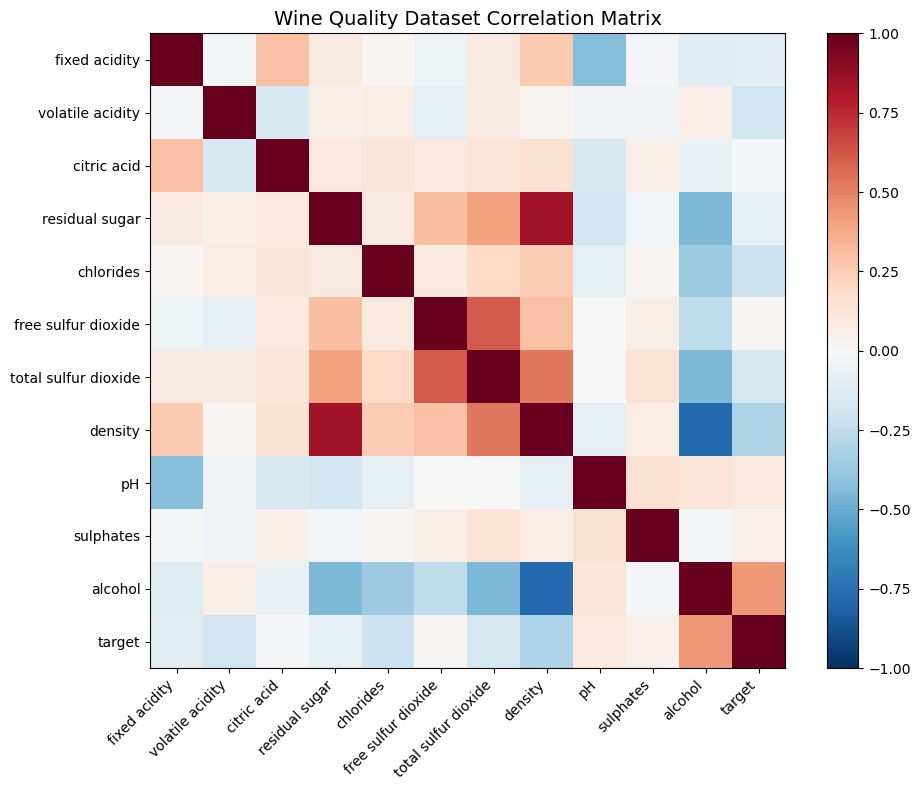

In [129]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
winequality_numeric = df[numeric_columns]

correlation_matrix = winequality_numeric.corr()
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix using matplotlib
plt.figure(figsize=(10, 8))
cmap = plt.cm.RdBu_r

# Plot the heatmap
im = plt.imshow(correlation_matrix, cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(im)

plt.title('Wine Quality Dataset Correlation Matrix', fontsize=14)
plt.xticks(np.arange(len(numeric_columns)), numeric_columns, rotation=45, ha='right')
plt.yticks(np.arange(len(numeric_columns)), numeric_columns)

# set and print the plot
plt.tight_layout()
plt.show()
plt.close()

#### PCA

In [130]:
# Create PCA instance
pca = PCA()
pca_result = pca.fit_transform(df_numeric)
explained_variance = pca.explained_variance_ratio_
n_components = pca.n_components_
half = n_components // 2
explained_by_first_half = explained_variance[:half].sum()
pca_result
print(f"Explained variance by first half ({half} components): {explained_by_first_half:.4f}")

Explained variance by first half (6 components): 1.0000


The alcohol feature has the highest correlation to the actual target, the rating of the wine by wine tasters.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

#### Imports

In [131]:
from scipy.stats import zscore

#### Z-scores - absolute score of 7/8

In [132]:
column = "fixed acidity"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 7]
print(outliers[[column, 'z_score']])

      fixed acidity   z_score
1526           14.2  8.705106


In [133]:
column = "volatile acidity"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 7]
print(outliers[[column, 'z_score']])

      volatile acidity   z_score
1951             1.005  7.211036
4039             1.100  8.153643


In [134]:
column = "citric acid"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 8]
print(outliers[[column, 'z_score']])

     citric acid   z_score
745         1.66  10.95642


In [135]:
column = "residual sugar"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 8]
print(outliers[[column, 'z_score']])

      residual sugar    z_score
2781            65.8  11.714112


In [136]:
column = "chlorides"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 8]
print(outliers[[column, 'z_score']])

      chlorides    z_score
484       0.346  13.743076
683       0.240   8.890871
687       0.290  11.179647
1034      0.244   9.073973
1217      0.301  11.683178
1638      0.239   8.845096
1865      0.255   9.577504
4473      0.271  10.309912


In [137]:
column = "total sulfur dioxide"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 7]
print(outliers[[column, 'z_score']])

      total sulfur dioxide   z_score
4745                 440.0  7.098444


In [138]:
column = "density"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 8]
print(outliers[[column, 'z_score']])

      density    z_score
2781  1.03898  15.031298


In [139]:
column = "pH"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 4]
print(outliers[[column, 'z_score']])

        pH   z_score
1250  3.82  4.184075
1255  3.81  4.117844
2036  3.80  4.051612
2771  3.80  4.051612


In [140]:
column = "sulphates"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 5]
print(outliers[[column, 'z_score']])

      sulphates   z_score
4886       1.08  5.171602


In [141]:
column = "alcohol"
df['z_score'] = zscore(df[column])
outliers = df[df['z_score'].abs() > 2.9]
print(outliers[[column, 'z_score']])

      alcohol   z_score
3918     14.2  2.995326


#### Histogram

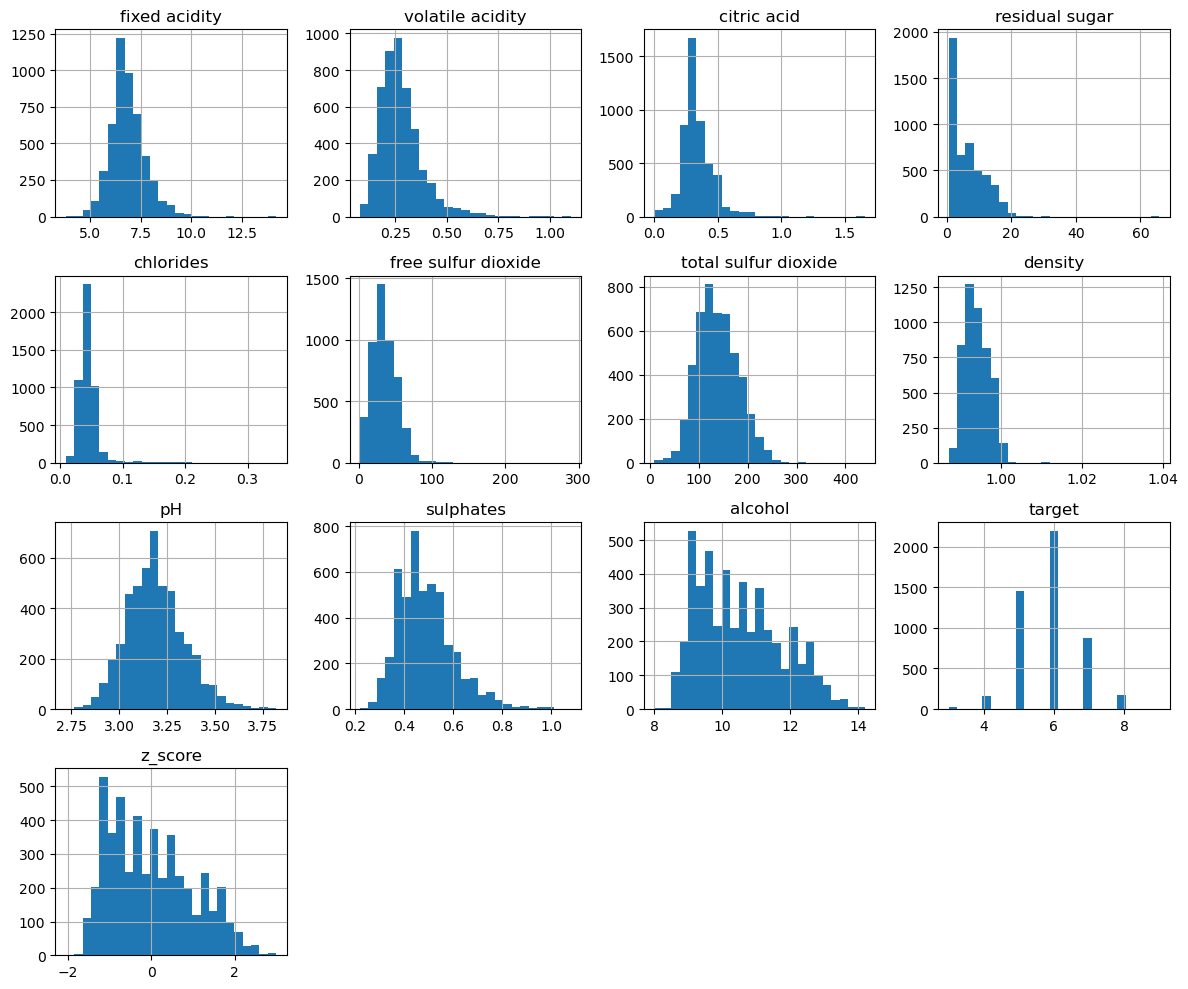

In [142]:
# YOUR CODE HERE
df.hist(bins=25, figsize=(12,10))
plt.tight_layout()

#### Scatter plots for each feature

##### chlorides

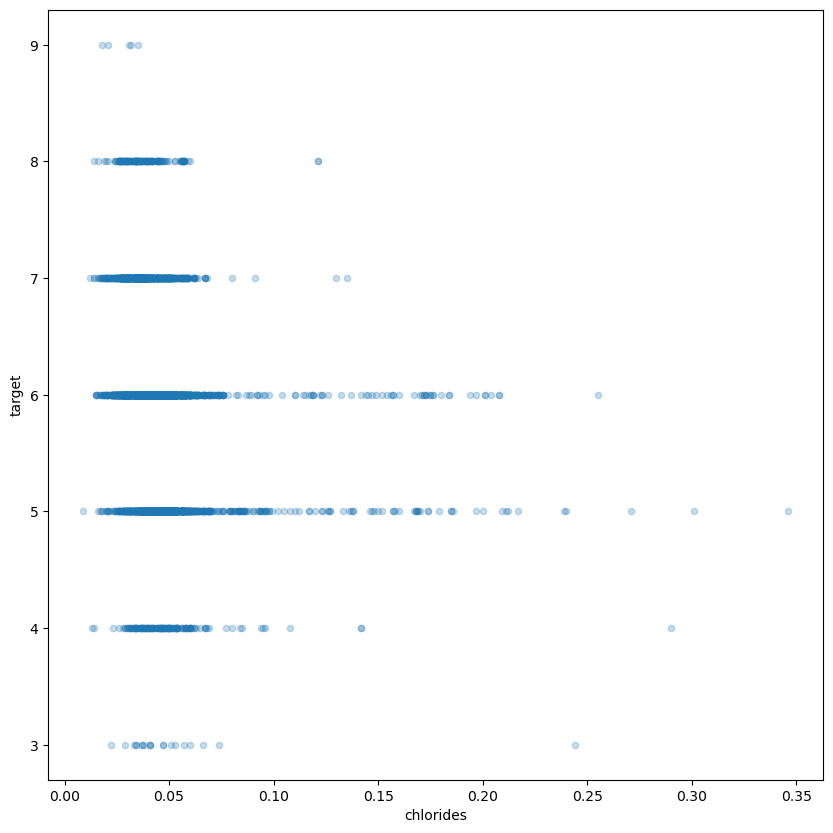

In [143]:
df.plot.scatter(x="chlorides", y="target", alpha=0.25, figsize = (10,10));

##### fixed acidity

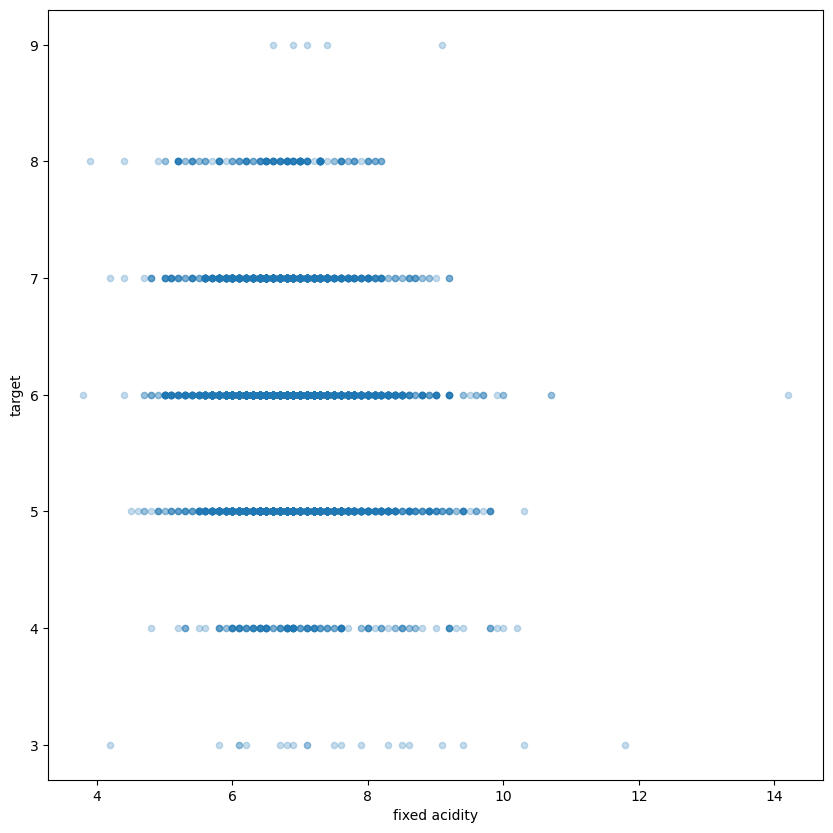

In [144]:
df.plot.scatter(x="fixed acidity", y="target", alpha=0.25, figsize = (10,10));

##### volatile acidity

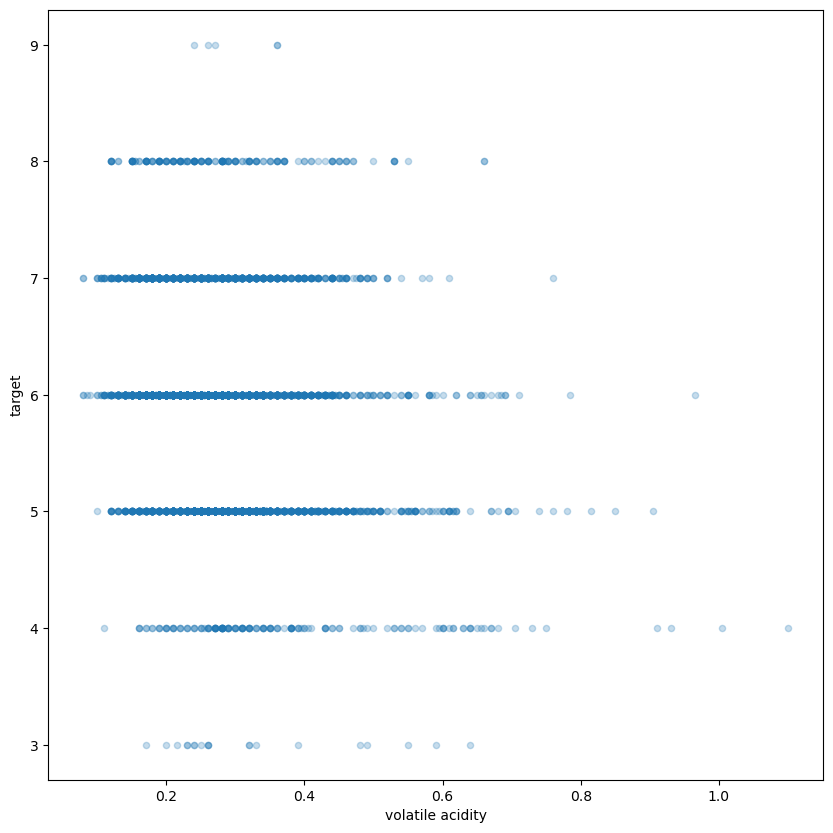

In [145]:
df.plot.scatter(x="volatile acidity", y="target", alpha=0.25, figsize = (10,10));

##### citric acid

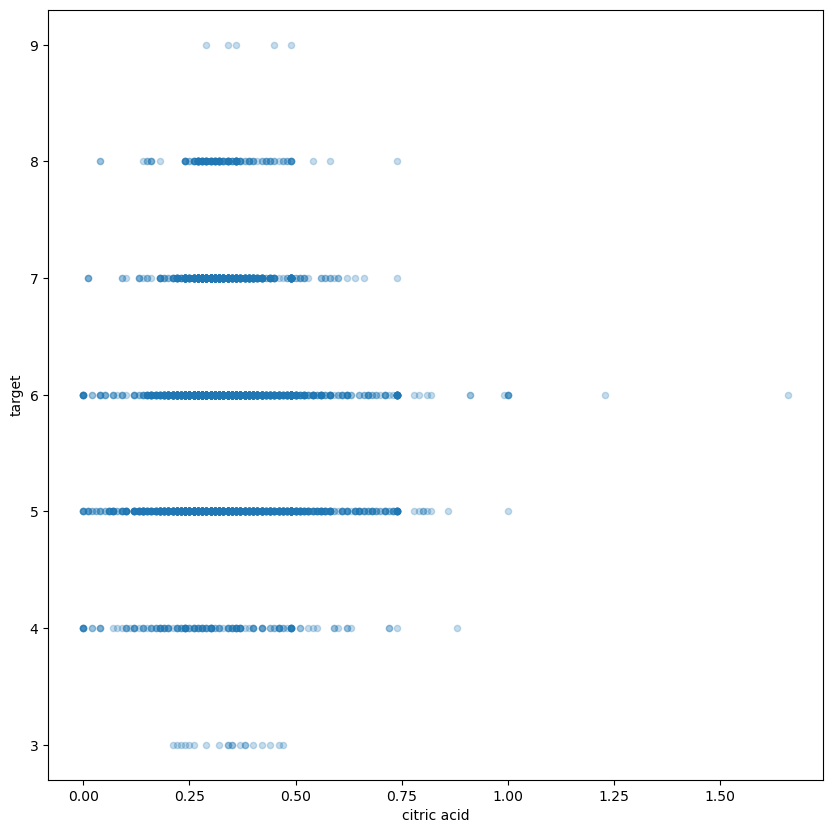

In [146]:
df.plot.scatter(x="citric acid", y="target", alpha=0.25, figsize = (10,10));

##### free sulfur dioxide

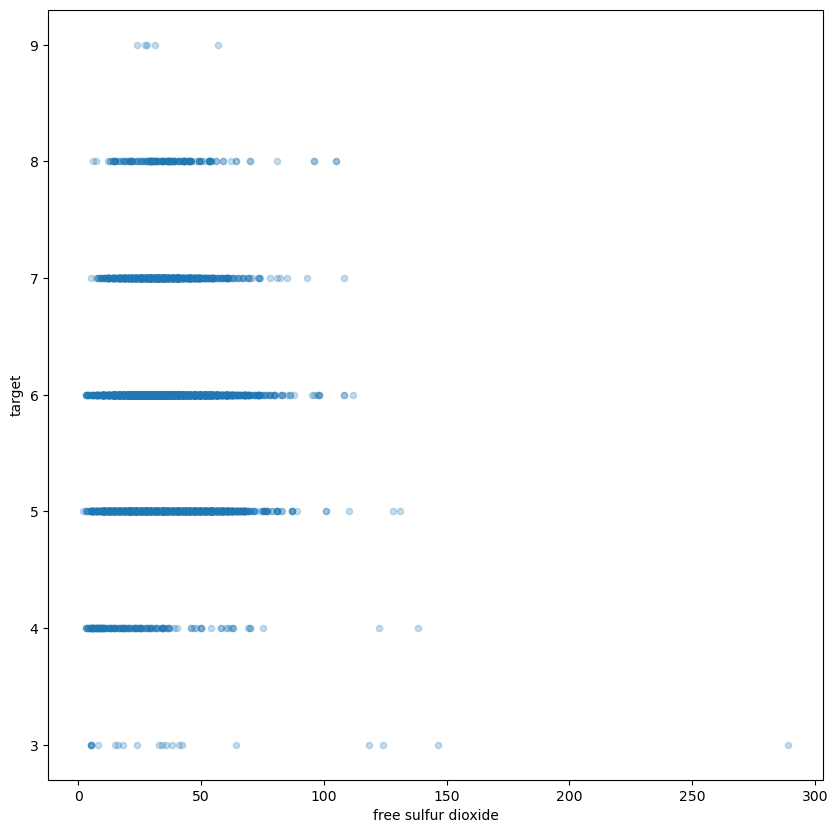

In [147]:
df.plot.scatter(x="free sulfur dioxide", y="target", alpha=0.25, figsize = (10,10));

##### total sulfur dioxide

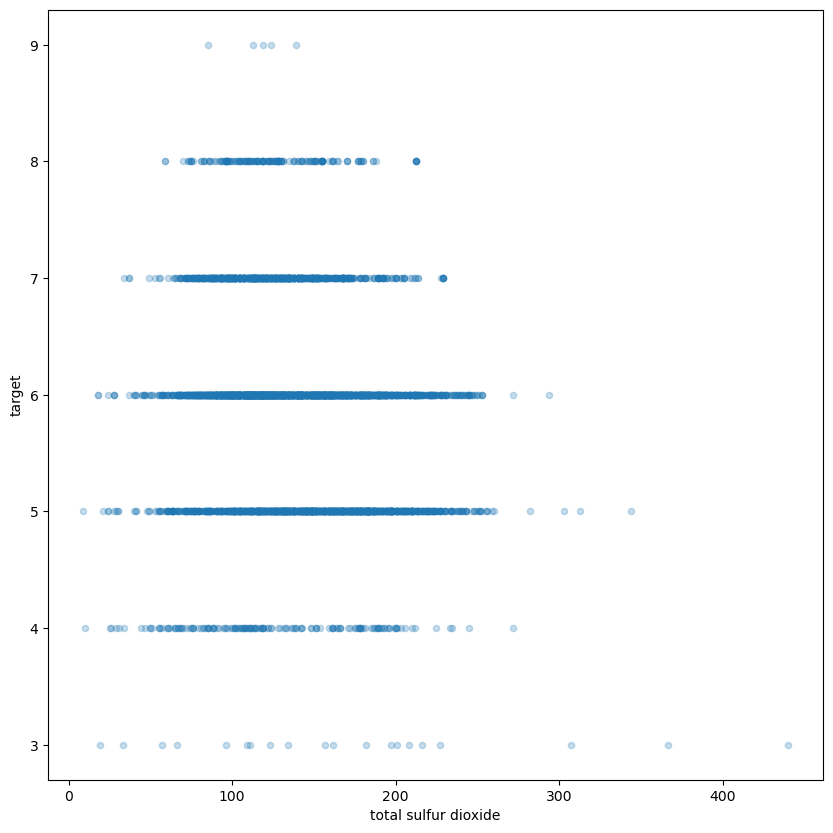

In [148]:
df.plot.scatter(x="total sulfur dioxide", y="target", alpha=0.25, figsize = (10,10));

##### residual sugar

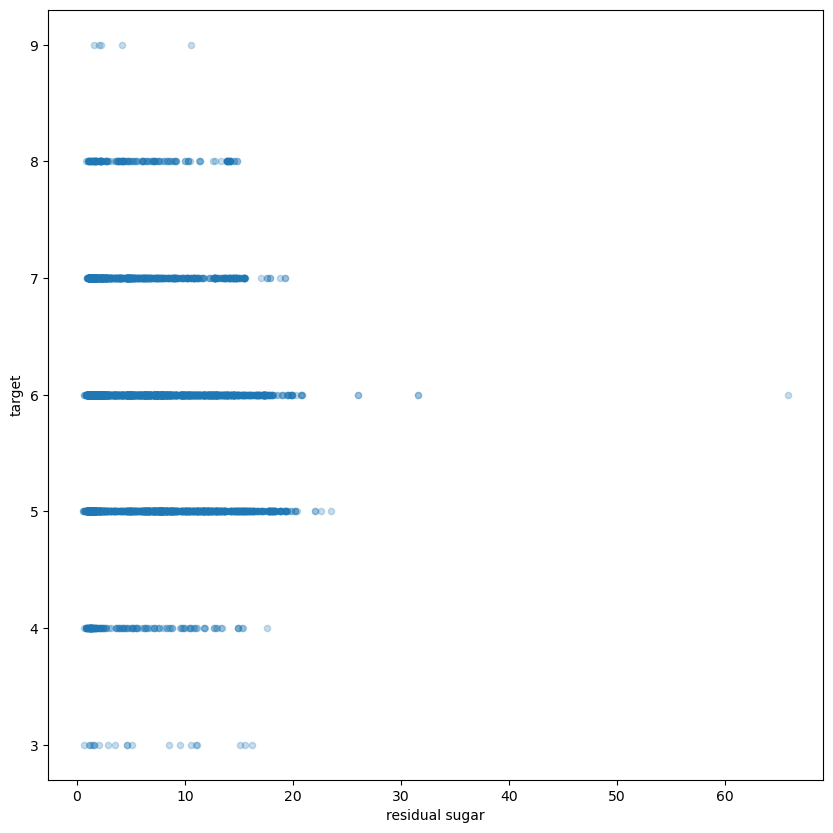

In [149]:
df.plot.scatter(x="residual sugar", y="target", alpha=0.25, figsize = (10,10));

##### density

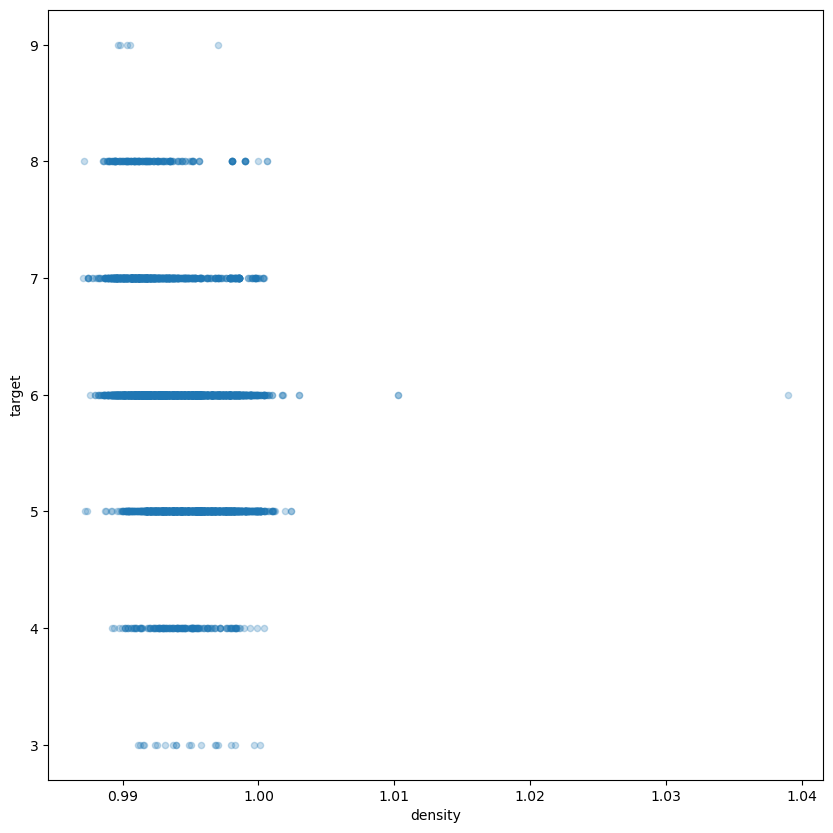

In [150]:
df.plot.scatter(x="density", y="target", alpha=0.25, figsize = (10,10));

##### pH

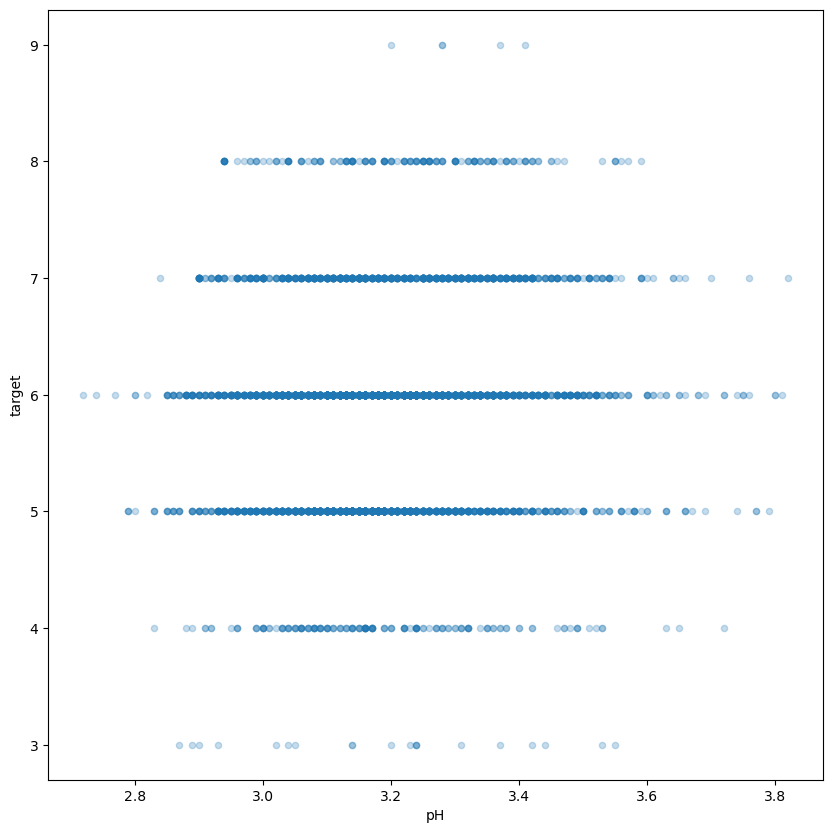

In [151]:
df.plot.scatter(x="pH", y="target", alpha=0.25, figsize = (10,10));

##### Sulfates

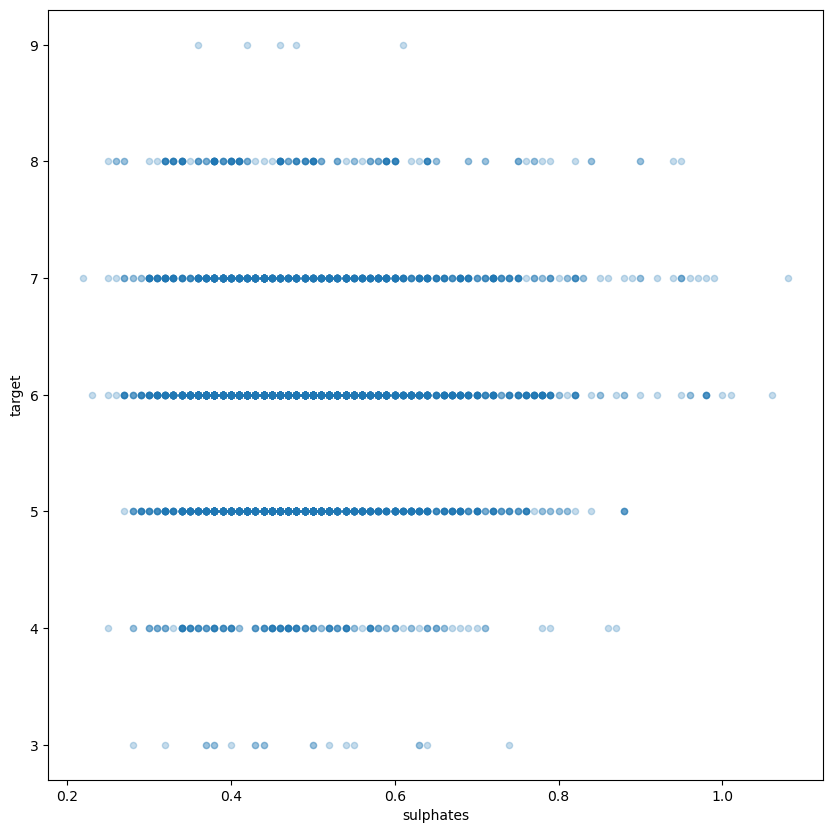

In [152]:
df.plot.scatter(x="sulphates", y="target", alpha=0.25, figsize = (10,10));

##### Alcohol

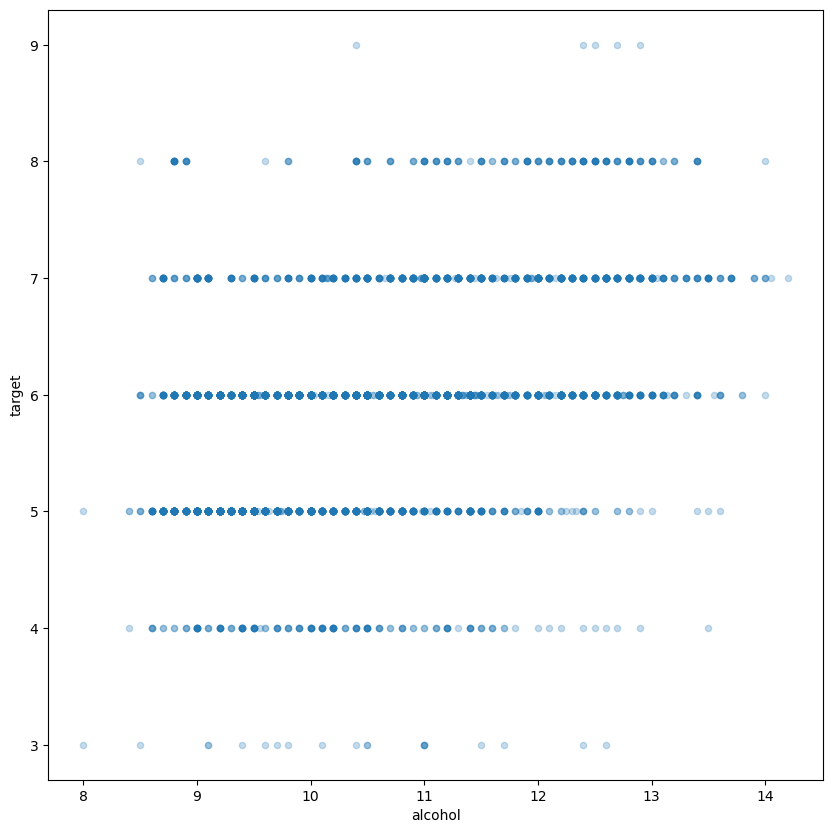

In [153]:
df.plot.scatter(x="alcohol", y="target", alpha=0.25, figsize = (10,10));

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE